# IPL Match Score Analysis

In [27]:
##importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [28]:
##loading the csv files into dataframes
df = pd.read_excel("./ipl_data/IPL2018_results.xlsx")

In [29]:
# !pip install openpyxl

In [30]:
df.head()

,scorecard_id,start_date,phase,stadium_name,home_team,away_team,toss_winner,toss_decision,innings1,wickets1,...,adjusted_target_indicator,adjusted_target,team1_overs,team2_overs,mom_player_id,mom_player,scoring_status,result_type,result_margin,winning_team
0,1056637,43197,NaN,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,Chennai Super Kings,f,165,4,...,n,0,20.0,20,44613,DJ Bravo,live bbb,ww,1,Chennai Super Kings
1,1056638,43198,NaN,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,f,166,7,...,n,0,20.0,20,170187,KL Rahul,live bbb,ww,6,Kings XI Punjab
2,1056639,43198,NaN,"Eden Gardens, Kolkata",Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,f,176,7,...,n,0,20.0,20,412485,N Rana,live bbb,ww,4,Kolkata Knight Riders
3,1056640,43199,NaN,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers,Rajasthan Royals,Sunrisers,f,125,9,...,n,0,20.0,20,15627,S Dhawan,live bbb,ww,9,Sunrisers
4,1056641,43200,NaN,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,f,202,6,...,n,0,20.0,20,119895,SW Billings,live bbb,ww,5,Chennai Super Kings


## The distribution of runs scored

- We are interested in are the runs scored by each team, which are listed in "innings1" and "innings2". 
- A histogram will show us the variation of runs scored. 
- We specify the number of 'bins' - we use 10 bins here, which divides the data between the highest and lowest scores into ten equals ranges of 16 (80-240) runs. 
- The vertical axis then tells us the frequency of scores in innings1 in each data range.

array([[<AxesSubplot:title={'center':'innings1'}>]], dtype=object)

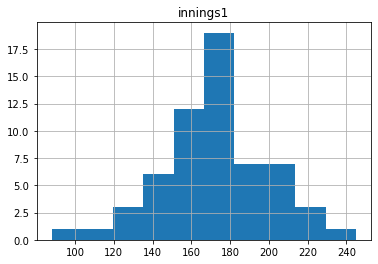

In [31]:
## score distribution when batting first
df.hist(column='innings1', bins=10)

array([[<AxesSubplot:title={'center':'innings2'}>]], dtype=object)

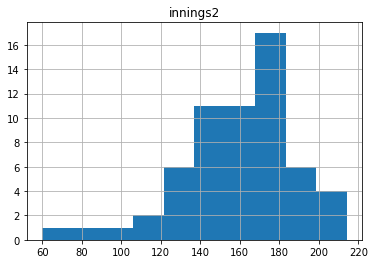

In [32]:
## score distribution when batting second
df.hist(column='innings2', bins=10)

- Scores in innings1 are skewed slightly to the left, and in innings2 slightly to the right. 
- **CATCH**: The x-axis for innings1 runs from 80 to 240, while for innings2 runs from 60 to 220. 
- To compare, the x-axis should have the same range for both sets of data.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

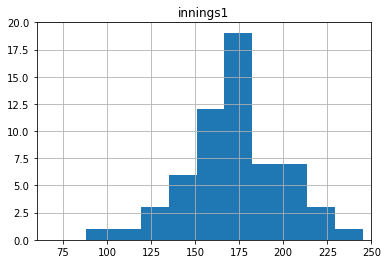

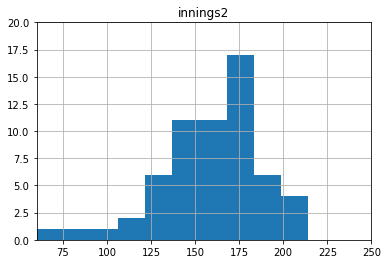

In [33]:
df.hist(column='innings1', bins=10)

##setting same limits for the X-axis
plt.xlim((60, 250))
plt.ylim((0, 20))

##innings 2
df.hist(column='innings2', bins=10)

##setting same limits for the X-axis
plt.xlim((60, 250))
plt.ylim((0, 20))
plt.plot

- The two innings have quite similar distributions centered around roughly the same median score. 
- The two main differences are that the scores for innings2 seem truncated around the 200-215 mark. 

**Potential inference**: That is probably a result of the run chase effect - teams batting second either reach the required target and stop, or the target set in the first place was so high that the team batting second collapsed with a very low score.

(0.0, 20.0)

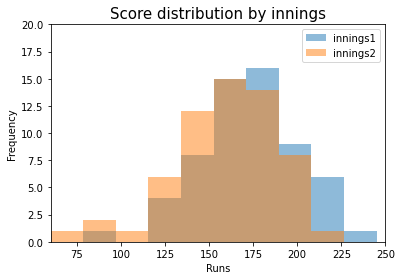

In [34]:
## plotting both innings on the same plot
df[['innings1','innings2']].plot.hist(alpha=.5,bins=10)
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title("Score distribution by innings", fontsize=15)
plt.xlim((60, 250))
plt.ylim((0, 20))

## Distribution of runs scored by winning and losing teams

In [35]:
## comparing the histograms for winners and losers

## segregating the win score from innings 1 & 2
df['winscore']= np.where(df['innings1'] > df['innings2'], df['innings1'], df['innings2'])

## segregating the lose score from innings 1 & 2 
df['losescore'] = np.where(df['innings1'] > df['innings2'], df['innings2'], df['innings1'])

df.head()

,scorecard_id,start_date,phase,stadium_name,home_team,away_team,toss_winner,toss_decision,innings1,wickets1,...,team1_overs,team2_overs,mom_player_id,mom_player,scoring_status,result_type,result_margin,winning_team,winscore,losescore
0,1056637,43197,NaN,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,Chennai Super Kings,f,165,4,...,20.0,20,44613,DJ Bravo,live bbb,ww,1,Chennai Super Kings,169,165
1,1056638,43198,NaN,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,f,166,7,...,20.0,20,170187,KL Rahul,live bbb,ww,6,Kings XI Punjab,167,166
2,1056639,43198,NaN,"Eden Gardens, Kolkata",Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,f,176,7,...,20.0,20,412485,N Rana,live bbb,ww,4,Kolkata Knight Riders,177,176
3,1056640,43199,NaN,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers,Rajasthan Royals,Sunrisers,f,125,9,...,20.0,20,15627,S Dhawan,live bbb,ww,9,Sunrisers,127,125
4,1056641,43200,NaN,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,f,202,6,...,20.0,20,119895,SW Billings,live bbb,ww,5,Chennai Super Kings,205,202


(0.0, 20.0)

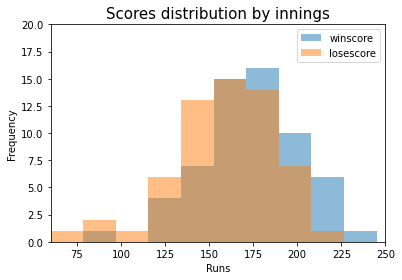

In [36]:
# Now we can plot two histograms together

df[['winscore','losescore']].plot.hist(alpha=.5,bins=10)
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title("Scores distribution by innings", fontsize=15)
plt.xlim((60, 250))
plt.ylim((0, 20))

### Difference in distribution:
- Winning score appears like a rightward shift of the losing score. Not surprising!!
- For a low score, losing scores must outnumber winning scores, while for high scores, winning scores must outnumber losing scores.

---
---

## Studying MI vs CSK match - When did MI lose the match?
#### Run Accumulation and Wickets

- The game is being played at Wankhede stadium.
- Who won the toss? What does our venue analysis say?
- Let's look at ball by ball data now.

In [37]:
match_df = pd.read_excel('ipl_data/MIvCSK.xlsx')
print(match_df.columns.tolist())
match_df

['MI_over_no', 'MI_ball_no', 'MI_runs_total_end', 'MI_delivery_no', 'MI_wicket', 'CSK_over_no', 'CSK_ball_no', 'CSK_runs_total_end', 'CSK_delivery_no', 'CSK_wicket']


,MI_over_no,MI_ball_no,MI_runs_total_end,MI_delivery_no,MI_wicket,CSK_over_no,CSK_ball_no,CSK_runs_total_end,CSK_delivery_no,CSK_wicket
0,0.0,1.0,0.0,1.0,0.0,0,1,0,1,0
1,0.0,2.0,0.0,2.0,0.0,0,2,1,2,0
2,0.0,3.0,0.0,3.0,0.0,0,3,2,3,0
3,0.0,4.0,4.0,4.0,0.0,0,4,3,4,0
4,0.0,5.0,5.0,5.0,0.0,0,5,3,5,0
...,...,...,...,...,...,...,...,...,...,...
119,19.0,4.0,162.0,120.0,0.0,19,1,159,120,0
120,19.0,5.0,164.0,121.0,0.0,19,2,159,121,0
121,19.0,6.0,165.0,122.0,0.0,19,3,159,122,0
122,NaN,NaN,NaN,NaN,NaN,19,4,165,123,0


#### Column meaning
- A Twenty20 game refers to 20 over, equal to 120 deliveries. 
- In the dataframe "ball_no" refers to the ball of the over in question, which is referred to by "over_no". 
- "delivery_no" refers to its position in the inning as a whole. 

There were 122 deliveries in the Mumbai innings, while there were 124 deliveries in the Chennai innings, despite only 19.5 overs being completed (Chennai won, i.e. surpassed the Mumbai score, with one ball to spare). 

This arises because some balls delivered do not count- these could be either "wides" - called when the umpire decides that the ball was delivered so far away from the batsman that he had no reasonable chance of hitting it - or "no balls", called when the bowler released the ball too close to the batsman (there is a line which the bowler must not overstep).



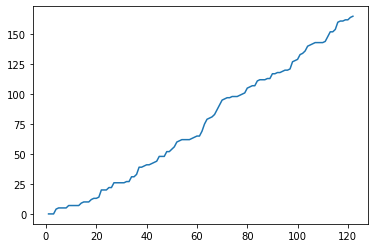

In [38]:
## plotting the deliveries on X-axis and the runs scored by Mumbai on Y-axis
plt.plot(match_df['MI_delivery_no'], match_df['MI_runs_total_end'])

#### Adding wickets to above plot

In [39]:
MI_wkt = match_df[match_df['MI_wicket'] > 0]
CSK_wkt = match_df[match_df['CSK_wicket'] > 0]
MI_wkt

,MI_over_no,MI_ball_no,MI_runs_total_end,MI_delivery_no,MI_wicket,CSK_over_no,CSK_ball_no,CSK_runs_total_end,CSK_delivery_no,CSK_wicket
12,2.0,1.0,7.0,13.0,1.0,2,1,16,13,0
23,3.0,6.0,20.0,24.0,1.0,3,6,31,24,0
75,12.0,3.0,98.0,76.0,1.0,12,2,76,76,0
88,14.0,4.0,113.0,89.0,1.0,14,3,103,89,0


In [42]:
CSK_wkt

,MI_over_no,MI_ball_no,MI_runs_total_end,MI_delivery_no,MI_wicket,CSK_over_no,CSK_ball_no,CSK_runs_total_end,CSK_delivery_no,CSK_wicket
21,3.0,4.0,20.0,22.0,0.0,3,4,27,22,1
35,5.0,5.0,33.0,36.0,0.0,5,6,42,36,1
38,6.0,2.0,40.0,39.0,0.0,6,3,42,39,1
51,8.0,3.0,60.0,52.0,0.0,8,3,51,52,1
73,12.0,1.0,98.0,74.0,0.0,11,6,75,74,1
77,12.0,5.0,100.0,78.0,0.0,12,4,83,78,1
79,13.0,1.0,105.0,80.0,0.0,12,6,84,80,1
91,15.0,1.0,118.0,92.0,0.0,14,6,105,92,1
103,16.0,7.0,140.0,104.0,0.0,16,5,118,104,1
118,19.0,3.0,162.0,119.0,0.0,18,6,159,119,1


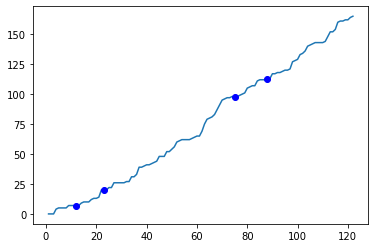

In [22]:
## adding MI wickets to the plot -  4 in total - depicted by blue circles (bo)
plt.plot(match_df['MI_delivery_no'],match_df['MI_runs_total_end'], MI_wkt['MI_wicket'], 'bo')




## Plotting both teams scores together

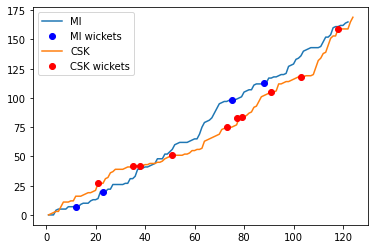

In [17]:
## plotting MI runs and wkts by deliveries
plt.plot(match_df['CSK_delivery_no'], 
         match_df['MI_runs_total_end'], 
         MI_wkt['MI_runs_total_end'], 'bo')

## plotting CSK runs and wkts by deliveries
plt.plot(match_df['CSK_delivery_no'], 
         match_df['CSK_runs_total_end'], 
         CSK_wkt['CSK_runs_total_end'], 'ro')

plt.legend(['MI', 'MI wickets', 'CSK', 'CSK wickets'])
